In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
from PIL import Image

# Paths to the dataset splits
base_path = "/content/drive/MyDrive/Road-Turn-Detections_Data_final"
splits = ["train", "valid", "test"]

# Class names (adjust if there are more classes)
class_names = ["Right-Turn", "Left-Turn"]  # Adjust as per your actual classes

# Step 1: Convert CSV annotations to YOLO format
for split in splits:
    split_path = os.path.join(base_path, split)
    csv_file = os.path.join(split_path, "_annotations.csv")
    if not os.path.exists(csv_file):
        print(f"CSV file not found for {split} split, skipping.")
        continue

    # Read the CSV file
    annotations = pd.read_csv(csv_file)

    # If class names in the dataset are not in 'class_names', print unique class names
    unique_classes = annotations['class'].unique()
    if not set(unique_classes).issubset(class_names):
        print(f"Unique classes in {split} dataset:", unique_classes)

    for _, row in annotations.iterrows():
        image_file = row['filename']
        image_path = os.path.join(split_path, image_file)

        if not os.path.exists(image_path):
            print(f"Image file '{image_file}' not found in {split} split, skipping.")
            continue

        # Open image to get dimensions
        with Image.open(image_path) as img:
            img_width, img_height = img.size

        # Handle the class id assignment
        try:
            class_id = class_names.index(row['class'])  # Converts 'class' names to numerical IDs
        except ValueError:
            print(f"Warning: Class '{row['class']}' not found in class_names.")
            continue  # Skip if the class name is not found in class_names

        # YOLO format values
        center_x = (row['xmin'] + row['xmax']) / 4 / img_width
        center_y = (row['ymin'] + row['ymax']) / 4 / img_height
        width = (row['xmax'] - row['xmin']) / img_width
        height = (row['ymax'] - row['ymin']) / img_height

        # Write to YOLO .txt file
        txt_filename = os.path.splitext(image_file)[0] + ".txt"
        txt_path = os.path.join(split_path, txt_filename)
        with open(txt_path, 'a') as f:
            f.write(f"{class_id} {center_x} {center_y} {width} {height}\n")

    print(f"Converted annotations for {split} split to YOLO format.")

# Step 2: Create YAML configuration file for YOLOv8
yaml_content = f"""
train: {os.path.join(base_path, 'train')}
val: {os.path.join(base_path, 'valid')}
test: {os.path.join(base_path, 'test')}

names:
"""
for i, class_name in enumerate(class_names):
    yaml_content += f"  {i}: {class_name}\n"

yaml_path = os.path.join(base_path, "road_turn_detection.yaml")
with open(yaml_path, 'w') as yaml_file:
    yaml_file.write(yaml_content)

print(f"YAML configuration file created at {yaml_path}")


Unique classes in train dataset: ['Right-Turn' 'straight' 'Left-Turn' 'unexpected']
Converted annotations for train split to YOLO format.
Unique classes in valid dataset: ['unexpected' 'Right-Turn' 'straight' 'Left-Turn']
Converted annotations for valid split to YOLO format.
Unique classes in test dataset: ['Left-Turn' 'straight' 'Right-Turn' 'unexpected']
Converted annotations for test split to YOLO format.
YAML configuration file created at /content/drive/MyDrive/Road-Turn-Detections_Data_final/road_turn_detection.yaml


In [ ]:
model = YOLO('yolov8m.pt')  # Change to a larger model size


100%|██████████| 49.7M/49.7M [00:00<00:00, 60.2MB/s]


In [ ]:
from ultralytics import YOLO

# Initialize YOLO model with pre-trained weights
model = YOLO('yolov8s.pt')

# Train the model
model.train(data="/content/drive/MyDrive/Road-Turn-Detections_Data_final/road_turn_detection.yaml",
            epochs=20, batch=16, imgsz=640)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 37.6MB/s]


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Road-Turn-Detections_Data_final/road_turn_detection.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

100%|██████████| 755k/755k [00:00<00:00, 3.13MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/drive/MyDrive/Road-Turn-Detections_Data_final/train... 50 images, 17 backgrounds, 0 corrupt: 100%|██████████| 67/67 [00:01<00:00, 52.78it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/train/IMG_8718_JPG.rf.757f93e74cac383546d9662fe3a71247.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/train/IMG_8719_JPG.rf.648a41d9bc43e6b5497ebee5b170e7c2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/train/IMG_8721_JPG.rf.f827f7b1b7f3cb418e999443b2ba29d9.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/train/IMG_8722_JPG.rf.964acddafb07b5c5685f5603fb28495d.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/train/IMG_8723_JPG.rf.54b618f69034b206b1d913178c109a96.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/train/IMG_8725_JPG.rf.143bfcbf49dbc0e2cf5840637277ebcb.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid... 13 images, 6 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<00:00, 44.47it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8717_JPG.rf.f9aa82f66b0e7eeb3702a60d01f4ce75.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8730_JPG.rf.e3255e0ad906a8eec18eb4d94d44818f.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8739_JPG.rf.39ed35d67db71719d3a71bc51abd2315.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8740_JPG.rf.71206626f99b89bd95b83ec52982e87e.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8744_JPG.rf.b4d29b2147cf8434cda1e876566a463b.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8747_JPG.rf.c533ea68625d50b0e548e00356b493f9.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Det

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      2.708      7.762      2.608          4        640: 100%|██████████| 5/5 [03:13<00:00, 38.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:16<00:00, 16.65s/it]

                   all         19         14    0.00105      0.312    0.00269   0.000877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G       2.32       4.96      2.414          3        640: 100%|██████████| 5/5 [02:54<00:00, 34.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.950s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<00:00, 18.13s/it]

                   all         19         14    0.00764        0.5      0.016     0.0075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      2.066      4.218      2.292          5        640: 100%|██████████| 5/5 [02:53<00:00, 34.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:19<00:00, 19.44s/it]

                   all         19         14      0.563     0.0625      0.102     0.0242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      2.186      5.913      2.327          1        640: 100%|██████████| 5/5 [02:50<00:00, 34.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.19s/it]

                   all         19         14     0.0666      0.367     0.0767     0.0194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.945      3.638       2.03          6        640: 100%|██████████| 5/5 [02:52<00:00, 34.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.38s/it]

                   all         19         14     0.0867      0.271     0.0687     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.967      3.571      2.035          4        640: 100%|██████████| 5/5 [02:47<00:00, 33.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.34s/it]

                   all         19         14      0.145      0.146      0.112     0.0221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.918      3.168      1.999          8        640: 100%|██████████| 5/5 [02:55<00:00, 35.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.23s/it]

                   all         19         14      0.213     0.0625     0.0503     0.0105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.887      3.314      2.059          3        640: 100%|██████████| 5/5 [02:46<00:00, 33.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.40s/it]

                   all         19         14     0.0364      0.458     0.0377    0.00816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      2.034      3.251      2.162          3        640: 100%|██████████| 5/5 [02:47<00:00, 33.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.52s/it]

                   all         19         14      0.156      0.271     0.0864     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      2.052      2.858       2.08          5        640: 100%|██████████| 5/5 [02:51<00:00, 34.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.66s/it]

                   all         19         14     0.0864      0.458      0.144     0.0407


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      2.197      3.455      2.427          3        640: 100%|██████████| 5/5 [02:53<00:00, 34.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.44s/it]

                   all         19         14     0.0286      0.208     0.0357     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.626      3.836       1.72          0        640: 100%|██████████| 5/5 [02:51<00:00, 34.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.44s/it]

                   all         19         14      0.993      0.167      0.191     0.0786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.976      3.321      2.176          3        640: 100%|██████████| 5/5 [02:53<00:00, 34.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.39s/it]

                   all         19         14      0.824      0.167      0.214     0.0706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      2.158      3.033      2.241          2        640: 100%|██████████| 5/5 [02:47<00:00, 33.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.44s/it]

                   all         19         14      0.584     0.0833      0.051     0.0155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.555      3.744      1.664          0        640: 100%|██████████| 5/5 [02:53<00:00, 34.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.35s/it]

                   all         19         14     0.0601      0.125     0.0758     0.0187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.964      2.836      2.101          3        640: 100%|██████████| 5/5 [02:47<00:00, 33.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:19<00:00, 19.11s/it]

                   all         19         14     0.0799      0.479     0.0788     0.0199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.987      2.962      2.089          2        640: 100%|██████████| 5/5 [02:49<00:00, 33.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.61s/it]

                   all         19         14     0.0419      0.229     0.0591     0.0145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      2.057      2.949      2.088          3        640: 100%|██████████| 5/5 [02:48<00:00, 33.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.34s/it]

                   all         19         14     0.0474      0.375     0.0568     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.664      2.443      1.865          2        640: 100%|██████████| 5/5 [02:45<00:00, 33.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.28s/it]

                   all         19         14     0.0774      0.545     0.0725     0.0194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.679      2.565      1.779          3        640: 100%|██████████| 5/5 [02:47<00:00, 33.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.17s/it]

                   all         19         14     0.0791      0.312      0.106     0.0212



20 epochs completed in 1.051 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:14<00:00, 14.71s/it]


                   all         19         14      0.993      0.167      0.191     0.0786
            Right-Turn          8          8          1          0     0.0155    0.00306
             Left-Turn          6          6      0.985      0.333      0.366      0.154
Speed: 2.4ms preprocess, 740.3ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a0021b52170>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
# Evaluate the model on the test data
metrics = model.val(data="/content/drive/MyDrive/Road-Turn-Detections_Data_final/road_turn_detection.yaml")
print(metrics)  # This will output mAP, IoU, precision, and recall scores.


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid.cache... 13 images, 6 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8717_JPG.rf.f9aa82f66b0e7eeb3702a60d01f4ce75.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8730_JPG.rf.e3255e0ad906a8eec18eb4d94d44818f.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8739_JPG.rf.39ed35d67db71719d3a71bc51abd2315.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8740_JPG.rf.71206626f99b89bd95b83ec52982e87e.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8744_JPG.rf.b4d29b2147cf8434cda1e876566a463b.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8747_JPG.rf.c533ea68625d50b0e548e00356b493f9.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Det


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.67s/it]


                   all         19         14      0.993      0.167      0.191     0.0786
            Right-Turn          8          8          1          0     0.0155    0.00306
             Left-Turn          6          6      0.985      0.333      0.366      0.154
Speed: 3.5ms preprocess, 882.6ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a00284cb160>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,  

In [ ]:
model.train(data="/content/drive/MyDrive/Road-Turn-Detections_Data_final/road_turn_detection.yaml",
            epochs=10, batch=5, imgsz=640, lr0=0.001)


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Road-Turn-Detections_Data_final/road_turn_detection.yaml, epochs=10, time=None, patience=100, batch=5, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

train: Scanning /content/drive/MyDrive/Road-Turn-Detections_Data_final/train.cache... 50 images, 17 backgrounds, 0 corrupt: 100%|██████████| 67/67 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/train/IMG_8718_JPG.rf.757f93e74cac383546d9662fe3a71247.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/train/IMG_8719_JPG.rf.648a41d9bc43e6b5497ebee5b170e7c2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/train/IMG_8721_JPG.rf.f827f7b1b7f3cb418e999443b2ba29d9.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/train/IMG_8722_JPG.rf.964acddafb07b5c5685f5603fb28495d.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/train/IMG_8723_JPG.rf.54b618f69034b206b1d913178c109a96.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/train/IMG_8725_JPG.rf.143bfcbf49dbc0e2cf5840637277ebcb.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive


val: Scanning /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid.cache... 13 images, 6 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8717_JPG.rf.f9aa82f66b0e7eeb3702a60d01f4ce75.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8730_JPG.rf.e3255e0ad906a8eec18eb4d94d44818f.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8739_JPG.rf.39ed35d67db71719d3a71bc51abd2315.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8740_JPG.rf.71206626f99b89bd95b83ec52982e87e.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8744_JPG.rf.b4d29b2147cf8434cda1e876566a463b.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Detections_Data_final/valid/IMG_8747_JPG.rf.c533ea68625d50b0e548e00356b493f9.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Road-Turn-Det

Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005078125), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.987      5.582      2.867          3        640: 100%|██████████| 14/14 [02:43<00:00, 11.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.71s/it]

                   all         19         14   0.000816      0.333    0.00435    0.00131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.538      5.461      2.675          3        640: 100%|██████████| 14/14 [02:43<00:00, 11.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.77s/it]

                   all         19         14    0.00142      0.562    0.00451     0.0012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.516      5.716      2.602          1        640: 100%|██████████| 14/14 [02:39<00:00, 11.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.60s/it]

                   all         19         14     0.0253      0.583      0.156     0.0457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      2.558      4.732      2.533          2        640: 100%|██████████| 14/14 [02:38<00:00, 11.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.74s/it]

                   all         19         14    0.00336          1      0.062     0.0194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      2.395      4.785      2.394          3        640: 100%|██████████| 14/14 [02:38<00:00, 11.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.57s/it]

                   all         19         14     0.0095      0.917     0.0349    0.00669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      2.448       4.41      2.389          3        640: 100%|██████████| 14/14 [02:42<00:00, 11.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.73s/it]

                   all         19         14     0.0521      0.312     0.0844     0.0185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      2.405      4.526       2.43          1        640: 100%|██████████| 14/14 [02:38<00:00, 11.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.75s/it]

                   all         19         14     0.0836      0.458      0.151     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      2.121      4.434      2.183          1        640: 100%|██████████| 14/14 [02:37<00:00, 11.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.71s/it]

                   all         19         14      0.377      0.454      0.245     0.0521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      2.226      5.384      2.222          0        640: 100%|██████████| 14/14 [02:38<00:00, 11.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.76s/it]

                   all         19         14      0.349      0.348      0.264     0.0587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      2.157      4.291      2.211          1        640: 100%|██████████| 14/14 [02:38<00:00, 11.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.62s/it]

                   all         19         14      0.161      0.274      0.208     0.0565



10 epochs completed in 0.494 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.26s/it]


                   all         19         14      0.349      0.348      0.264     0.0587
            Right-Turn          8          8      0.594      0.195      0.252     0.0658
             Left-Turn          6          6      0.104        0.5      0.275     0.0516
Speed: 3.9ms preprocess, 723.7ms inference, 0.0ms loss, 10.2ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a00286d7f70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804


image 1/1 /content/drive/MyDrive/images/DALL·E 2024-11-08 00.50.10 - A collection of high-resolution images of roads in Gilgit with diverse conditions, focusing on turns and straight paths in various weather and lightin.webp: 384x640 1 car, 3544.0ms
Speed: 23.1ms preprocess, 3544.0ms inference, 17.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


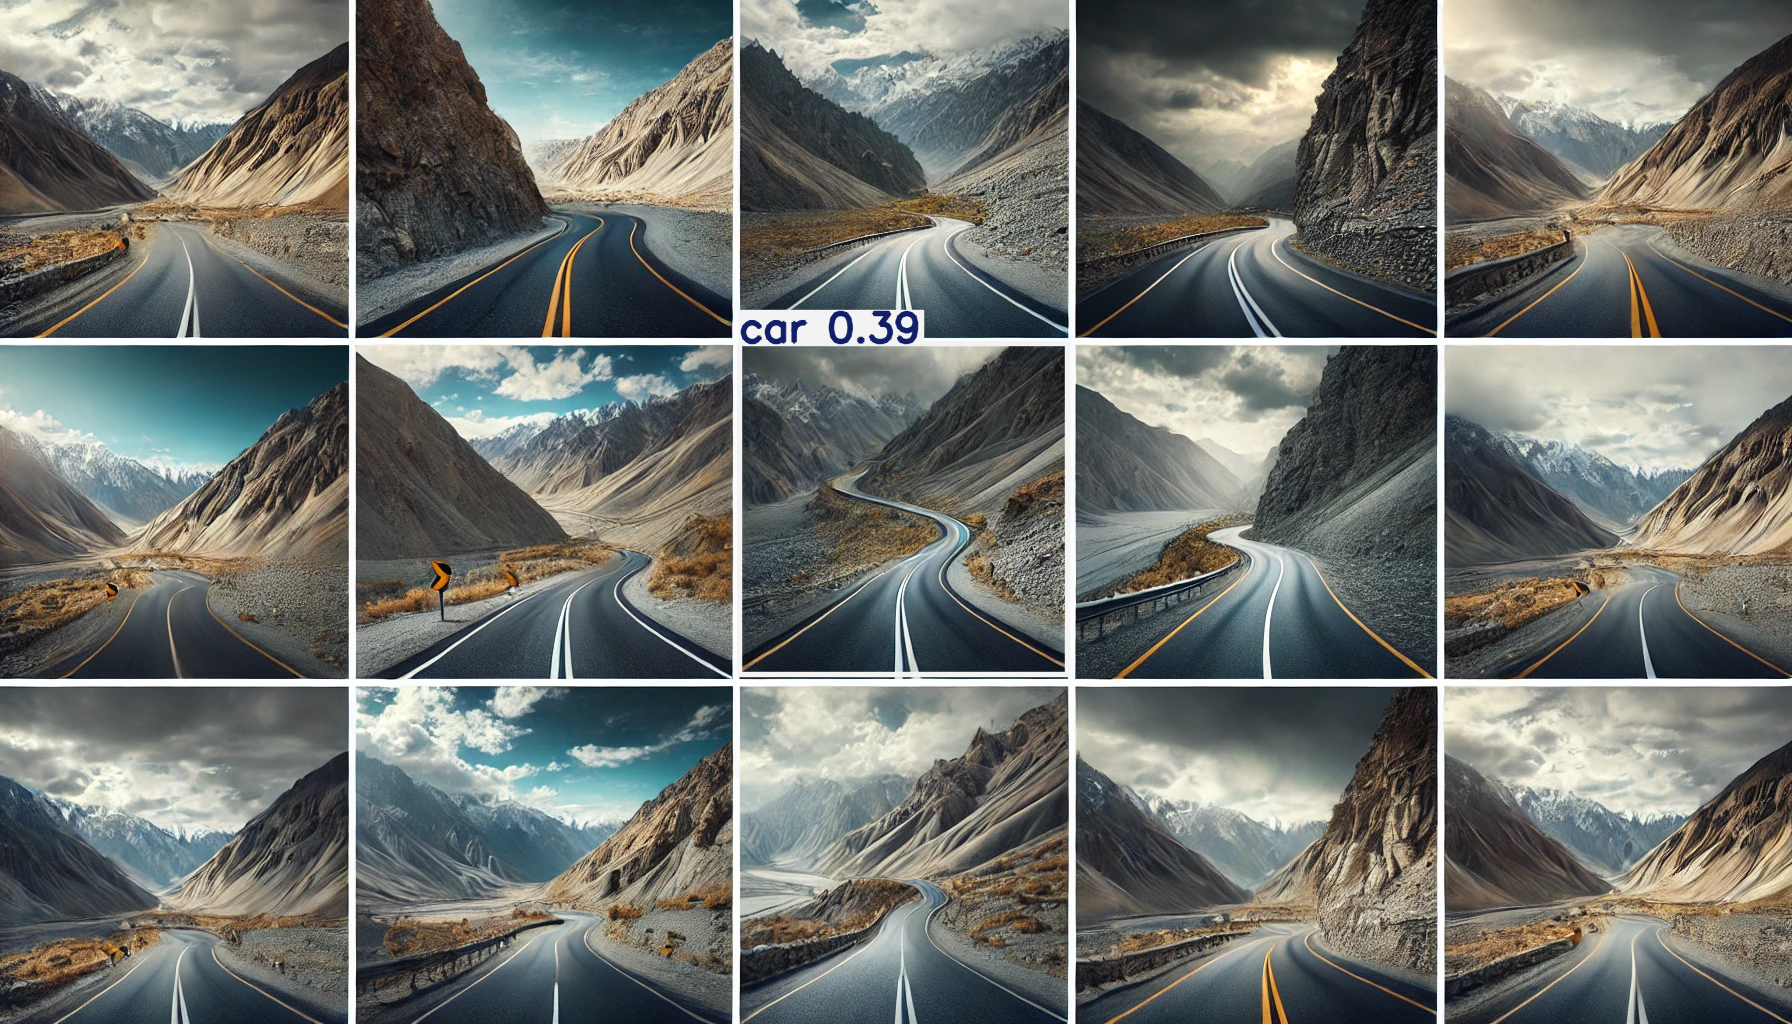

In [ ]:
# Use the model to make predictions on new images
results = model.predict("/content/drive/MyDrive/images/DALL·E 2024-11-08 00.50.10 - A collection of high-resolution images of roads in Gilgit with diverse conditions, focusing on turns and straight paths in various weather and lightin.webp", save=True)

# Display each result
for result in results:
    result.show()  # This will display each prediction
